<a href="https://colab.research.google.com/github/jaechanjo/TIL/blob/main/211107-%5BUnsupervised%20Learning%5D_K_means_PCA-SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2. 다양한 패턴의 2차원 상의 점을 구분해 내는 방법

## Step 0. 데이터 소개 및 학습목표

**데이터는 아래와 같은 생성 데이터를 기반으로 합니다.**



- 선형 관계를 가진 클러스터

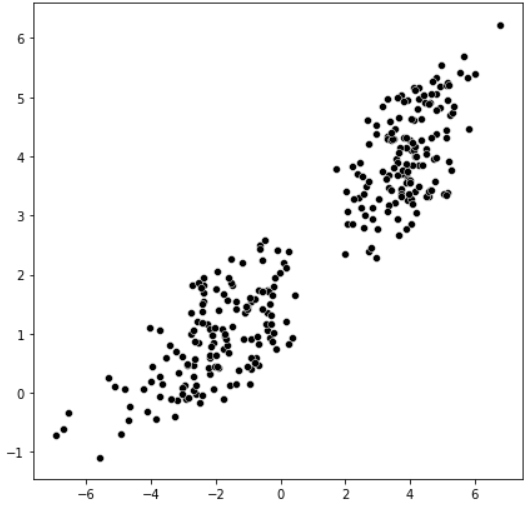

- 비선형 관계를 가진 클러스터
 - Concentric circles
 - Interleaving half circles
 - Spiral


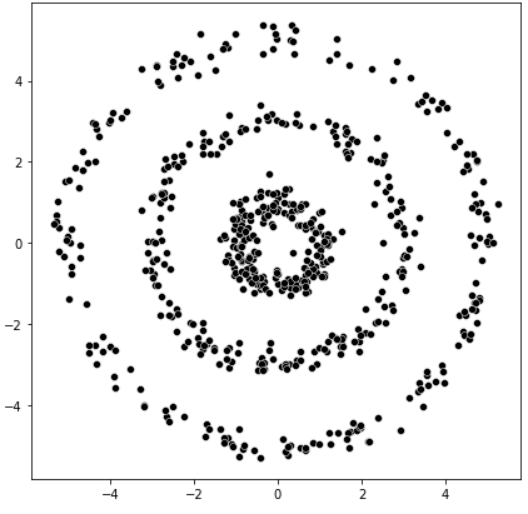

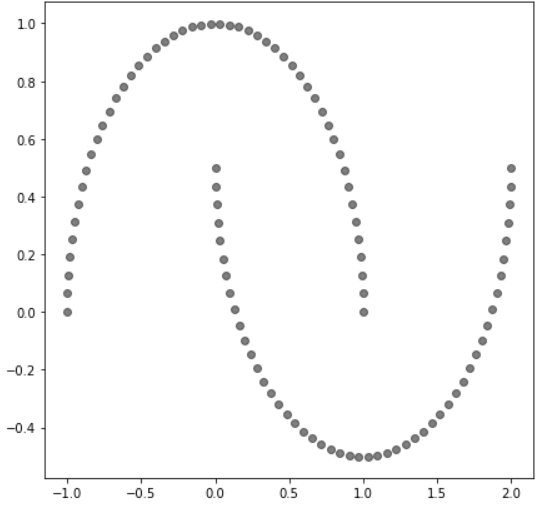

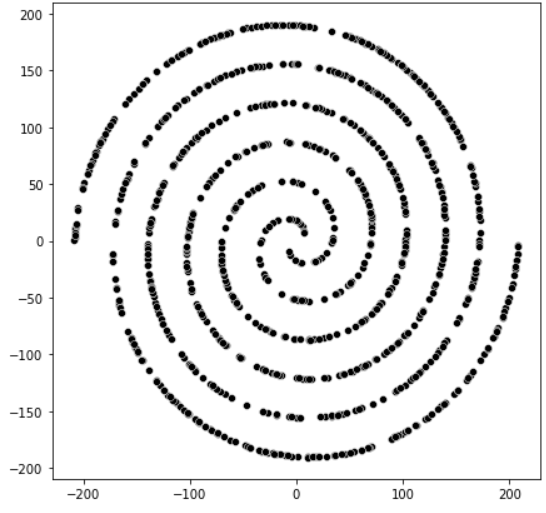

- 아래는 데이터를 생성할 때 가정된 클러스터 정보입니다


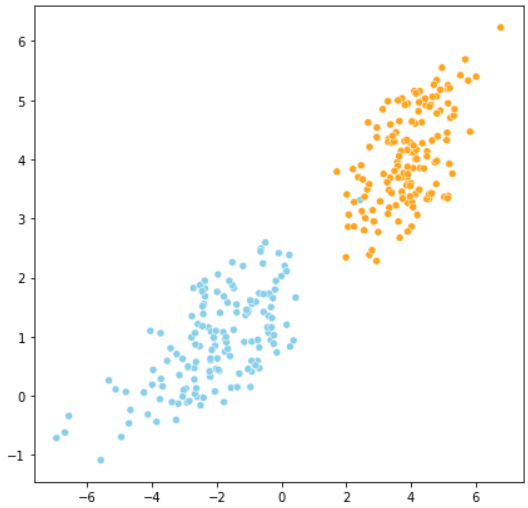

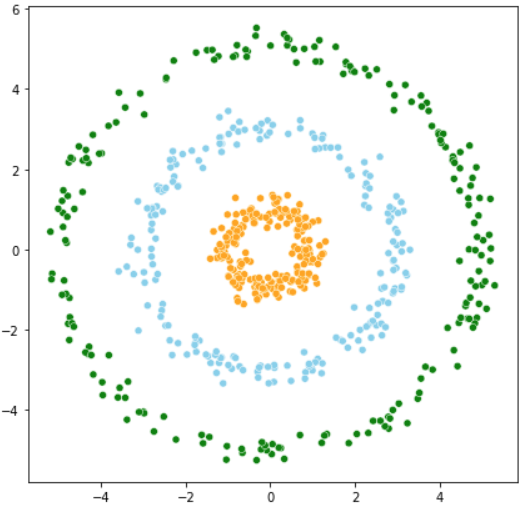

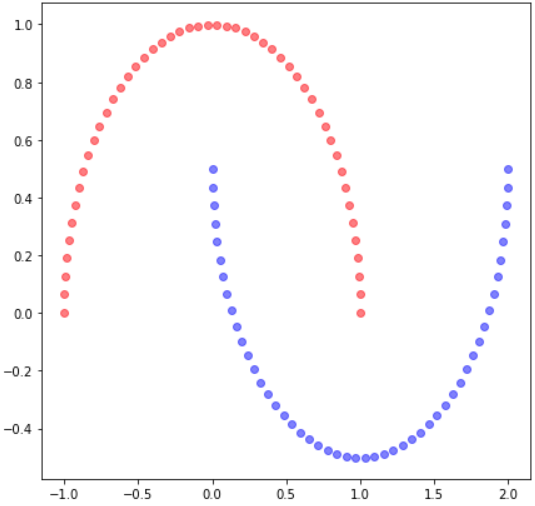

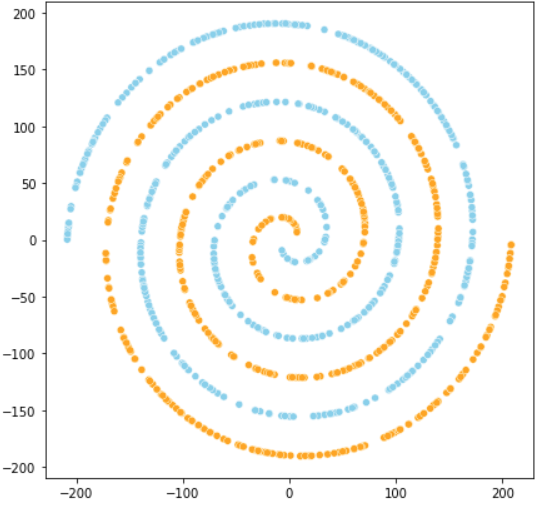

- 설명변수만을 가지고 다양한 데이터의 패턴을 잡아내어 클러스터를 구분해내거나 차원을 축소하는 것이 본 강의의 목적입니다.
- 비지도적 학습방법을 활용하여 데이터 생성시에 가정된 클러스터 정보와 최대한 비슷하게 클러스터를 구분해 내고자 하며, 이를 위하여 Principal Component를 활용합니다.


### **학습목표**
```
- 비지도학습의 개념을 이해.
- Principal Component에 대한 개념과 목적을 이해.
- 선형 패턴과 비선형 패턴의 차이와 이에 따른 접근방법 이해.
- 비선형 패턴 데이터를 다루기 위한 Kernel PCA 이해.
- 분석 상황에서의 Principal Componenet 활용.
``` 

##Step 1. 패턴 데이터 생성

###문제 1. 그림을 바탕으로 데이터 생성하기 - 선형 관계

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification

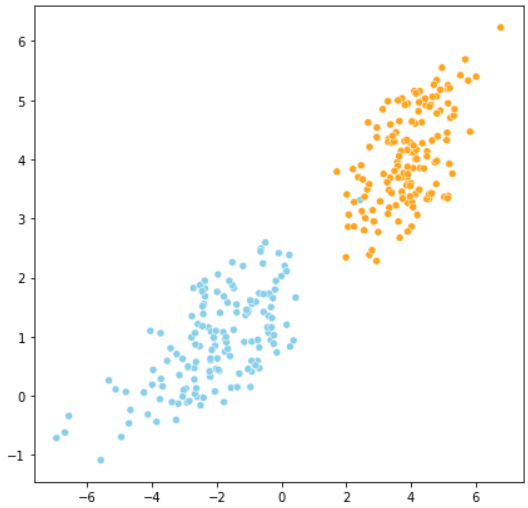

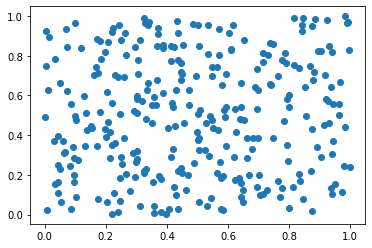

In [ ]:
X_1, y_1 = make_classification(n_samples=300,n_features=2,n_redundant=0 , n_informative=2, random_state=1, n_clusters_per_class=1, n_classes=2, class_sep=3)

# plt.scatter(X_1[:,0], X_1[:,1])
# plt.scatter(X_1[:,0], (X_1[:,0]+X_1[:,1])/2)

rng= np.random.RandomState(2)
# X_1 += 2*rng.uniform(size=X_1.shape)

X_1 += 2*rng.uniform(size=X_1.shape)

# plt.scatter(X_1[:,0], X_1[:,1])

In [2]:
##(문제) sklearn.datasets.make_classification을 활용하여 위의 그림과 같은 데이터를 생성합니다.
# 두 클러스터를 모두 합쳐 관측치의 개수는 300개입니다.
# 두 클러스터가 대부분의 점들이 잘 구분되며 두 클러스터 모두 우상향 하는 모습을 가져야 합니다. 데이터가 정확히 같을 필요는 없습니다.
X_1, y_1 = make_classification(n_samples=300,n_features=2,n_redundant=0 , n_informative=2, random_state=1, n_clusters_per_class=1, n_classes=2, class_sep=3)
X_1[:,1]=(X_1[:,0]+X_1[:,1])/2
rng= np.random.RandomState(2)
X_1 += 2*rng.uniform(size=X_1.shape)

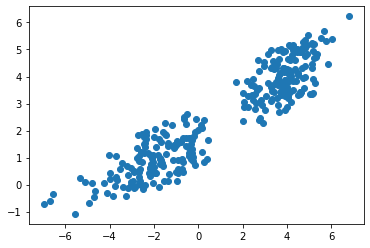

In [ ]:
plt.scatter(X_1[:,0], X_1[:,1])

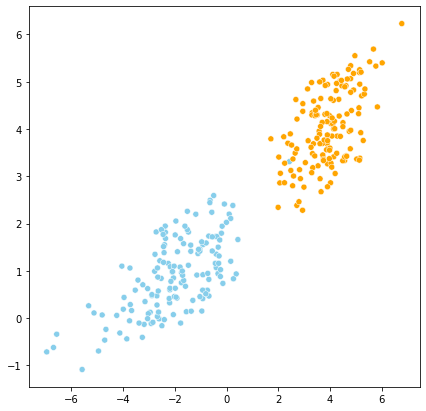

In [ ]:
## (문제) seaborn.scatterplot을 이용하고 아래의 color_code와 plot 세팅을 활용하여 플랏을 그립니다.
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7,7))

sns.scatterplot(x=X_1[:,0],y=X_1[:,1],c=[color_code.get(i) for i in y_1])
plt.show()

### 문제 2. 그림을 바탕으로 데이터 생성하기 - 비선형 관계

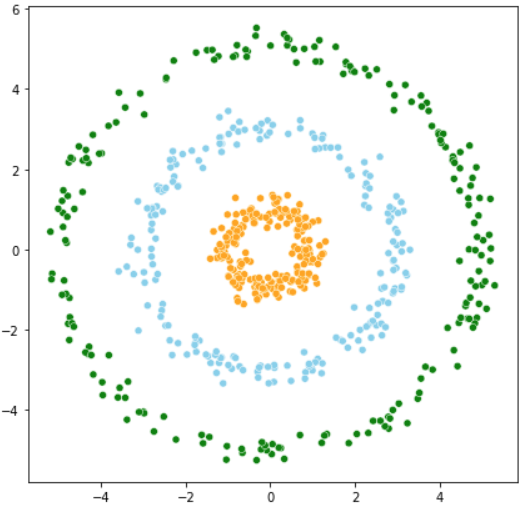

In [ ]:
np.repeat(3, 100)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [3]:
##(문제) (x,y)=(r*cos(theta),r*sin(theta))임을 활용하여 위의 그림과 같은 데이터를 생성합니다.

np.random.seed(1)
def CircleXY(r, n, sigma):
    theta = np.random.uniform(low=0, high=2*np.pi, size=n)
    x_error = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_error = np.random.normal(loc=0.0, scale=sigma, size=n)

    x_val = r*np.cos(theta)+x_error
    y_val = r*np.sin(theta)+y_error
    return x_val, y_val, np.repeat(r, n)


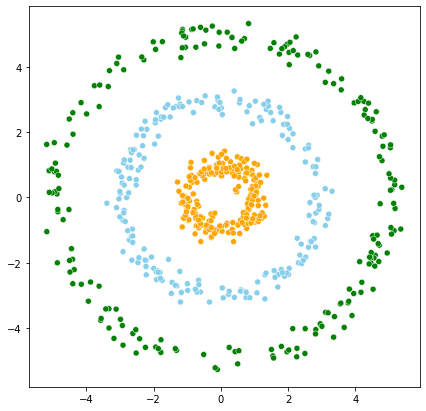

In [5]:
##(문제) seaborn.scatterplot을 이용하고 아래의 파라미터들을 활용하여 Concentric circles 플랏을 완성합니다.
plt.figure(figsize=(7,7))
n = 200
r_list =[1, 3, 5]
sigma = 0.2
param_lists = [(r, n, sigma) for r in r_list] 
coordinates = [ CircleXY(param[0], param[1], param[2])  for param in param_lists]
color_code = {1:'Orange', 3:'Skyblue', 5:'Green'}


for j in range(0, len(coordinates)):
  x,y,group = coordinates[j]
  sns.scatterplot(x=x,y=y,c=[color_code.get(i) for i in group])

plt.show()

In [6]:
# 아래와 같이 데이터를 정리합니다.
X1,X2,y_2_bf=[ np.append(np.append(coordinates[0][i],coordinates[1][i]),coordinates[2][i])  for i in range(0,3)]
X_2=np.c_[X1,X2]
mapping_dic = {1:0, 3:1, 5:2}
y_2_bf2=[mapping_dic.get(i) for i in y_2_bf]
y_2=np.array(y_2_bf2)

##Step 2. 전통적 clustering을 통한 접근

###문제 3. [K-means] K-means clustering - 기본 모형 생성 (선형 관계) 

- K-means 알고리즘

 (1) 중심점 (X 표시)을 임의로 선정. (그림 a)

 (2) 각 데이터 포인트에 대해 가장 가까운 중심점을 찾고, 해당 군집을 할당. (그림 b)

 (3) 할당된 군집을 기반으로 새로운 중심점을 계산. (그림 c)
 
 (4) 각 클러스터의 할당이 바뀌지 않을 때까지 (2),(3) 반복.

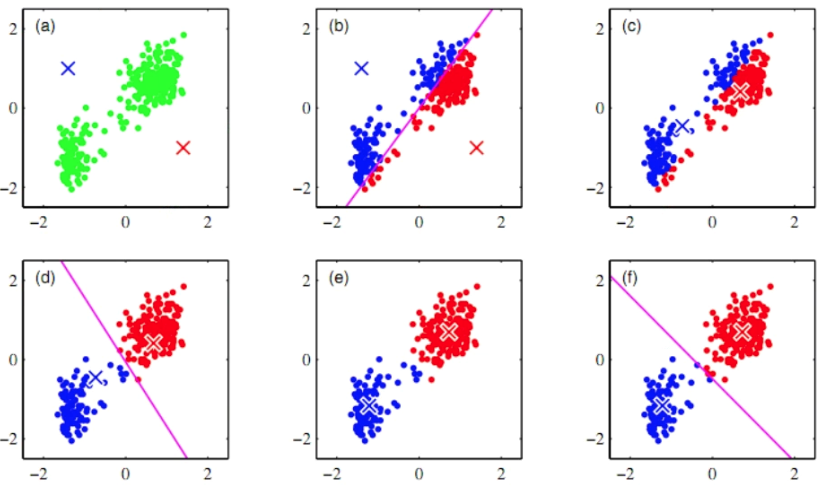

Image reference: Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

In [12]:
from sklearn.cluster import KMeans

In [ ]:
## (문제) sklearn.cluster.KMeans를 활용하여 클러스터링을 진행하여 km에 저장합니다. n_clusters = 3, random_state=1 으로 지정합니다.
# centers에 클러스터별 중심값을 저장하고, y_km에  cluster 정보를 저장합니다.
km=KMeans(n_clusters=3,random_state=1)
km.fit(X_1) -> # PCA를 해주면, X_1 부분집합인 PCscore1 - 공분산 타원의 고유값이 가장 큰 장축 방향의 eigen vector를 기준으로 구분한 데이터만으로도 학습하여도 (모델이 이 기준을 찾고, 써먹어서 결국,) 분류 성능이 좋다. 


KMeans(n_clusters=3, random_state=1)

In [ ]:
centers=km.cluster_centers_
y_km=km.labels_

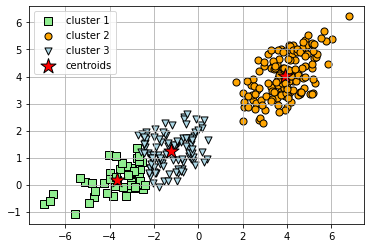

In [ ]:
# 아래 코드를 활용해 플랏을 그립니다.
plt.scatter(
    X_1[y_km == 0, 0], X_1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_1[y_km == 1, 0], X_1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_1[y_km == 2, 0], X_1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

###문제 4. [K-means] K-means clustering - 최적의 k 찾기 (선형 관계) 

In [ ]:
## (문제) sklearn.cluster.KMeans를 fit한 후 이것의 inertia_를 활용하여 플랏을 그리고 elbow method 를 활용하여 적정 k를 구합니다.
# 고려하는 k는 1에서 10까지로 합니다. KMeans 함수에 random_state=1 옵션을 적용합니다.

distortions=[]
for i in range(1,11):
  km=KMeans( n_clusters=i, random_state=1)
  km.fit(X_1)
  distortions.append(km.inertia_) # km.inertia_ 최적의 K의 평가 지표 = 군집 내 거리/군집 간 거리




C:\BIGDATA\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


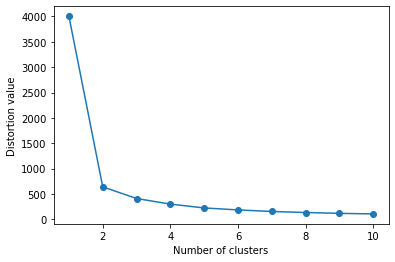

In [ ]:
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion value')
plt.show()

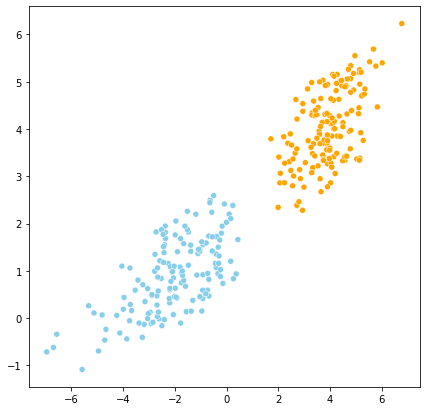

In [ ]:
## (문제) seaborn.scatterplot을 이용하고 위의 클러스터링 결과를 활용하여 클러스터별 color_code를 적용하고 플랏을 그립니다.
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2 , random_state=1)
km.fit(X_1)
y_km=km.labels_

sns.scatterplot(x=X_1[:,0],y=X_1[:,1],c=[color_code.get(i) for i in y_km])
plt.show()





In [ ]:
from sklearn.decomposition import KernelPCA
c=0.08
sigmaval=np.sqrt(c/2)


scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=sigmaval)
X_skernpca = scikit_kpca.fit_transform(X_2)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y_2==0, 0], X_skernpca[y_2==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y_2==1, 0], X_skernpca[y_2==1, 1], color='blue', alpha=0.5)
plt.scatter(X_skernpca[y_2==2, 0], X_skernpca[y_2==2, 1], color='green', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##Step 3. Principal Component를 활용한 접근 (선형 관계) 

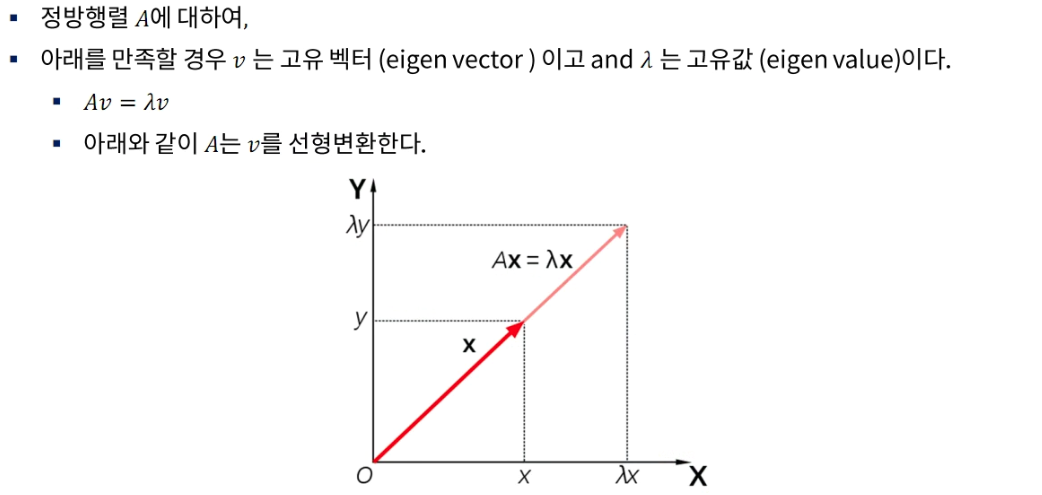

https://upload.wikimedia.org/wikipedia/commons/0/06/Eigenvectors.gif

Image Reference: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

  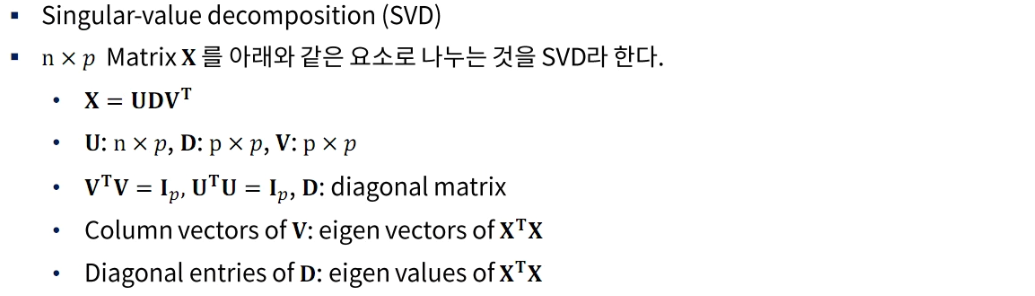

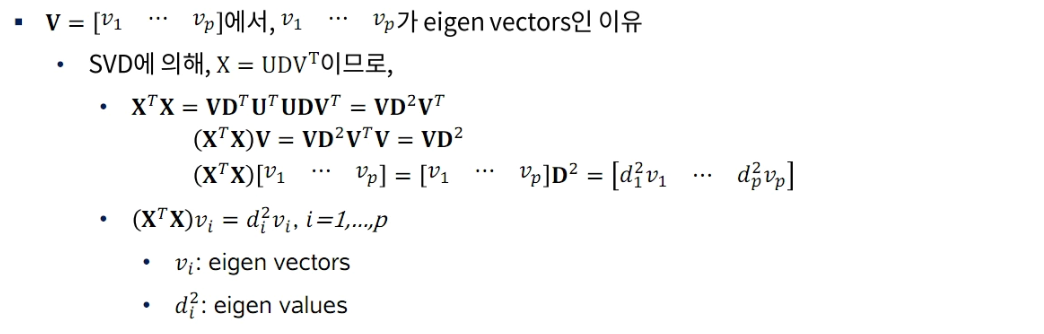

### 문제 5. [PCA] PCA를 위한 Singular Value Decomposition (SVD) 진행 

In [ ]:
# PCA를 하는 과정에서는, XX.T가 Cov.matrix와 같은 개념이 된다.
# SVD 정의에 따라, XX.T의 eigen vector가 aV, eigen value가 엄밀히 따지면 aD, d^2(PCA, SVD 작업에서는 sqrt무시)

2

In [ ]:
## (문제) X_1 데이터의 각 변수를 평균이 0이 되도록 만들어 mX에 저장합니다.이렇게 진행하면 mX의 Quadratic 형태가 Covariance와 상수배가 됩니다.
mX=X_1
for i in range(X_1.shape[1]):
  mX[:,i]=mX[:,i]-np.mean(X_1[:,i]) # 편차로 바꿔준다. 왜? 편차의 합은 0 즉, 평균이 0이 되므로.

In [ ]:
## (문제) numpy.cov를 활용하여 mX의 공분산행렬을 구하여 A에 저장합니다.
A=np.cov(mX.transpose())

In [ ]:
np.cov(mX.T) # [x의 분산, xy의 분산], [xy의 분산, y의 분산]

array([[10.32543426,  5.22917238],
       [ 5.22917238,  3.06569127]])

In [ ]:
## (문제) numpy.linalg.svd를 활용하여 SVD를 진행하여 aU, aD, aY에 저장합니다.
aU,aD,aV=np.linalg.svd(A)

In [ ]:
## (문제) PC score를 구해내어서 XY에 저장합니다. mX 행렬에 eigenvector를 곱하여 구합니다.
XV=np.dot(mX,aV) # XV = UD -> PC Score

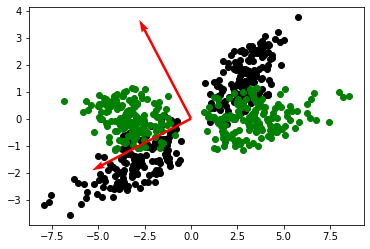

In [ ]:
plt.scatter(mX[:,0],mX[:,1],color="black")
plt.scatter(XV[:,0],XV[:,1],color="green")
origin = (0, 0) 
plt.quiver(origin[0],origin[1], aV[0,0], aV[1,0], color=['r','b'], scale=3)
plt.quiver(origin[0],origin[1], aV[0,1], aV[1,1], color=['r','b'], scale=3)
plt.show()

# 원래 데이터의 공분산을 생각했다. 평균을 0으로 Centering하여 공분산을 봤지. 즉, 원점(0,0)을 중심으로 한 타원을 그릴 수 있지.
# 그때, eigen vector는 기울어진 선형의 축을 설명하는 하나와, 그 수직인 다른 하나 2개다. 
# 타원의 장축(선형의 축)이 eigen value 값이 가장 크고, 타원의 단축(선형의 축의 수직)이 eigen value값이 가장 작다.
# 그리고 PC Score는 eigen vector의 선형성을 추출하여, 선형 패턴을 제거한 데이터이다. 
# -> 차원 축소1 -> 이 중에서도 고유값이 가장 큰 순서대로 주성분 추출 -> 차원 축소2 -> 과적합 방지 -> 성능 개선

### 문제 6. [PCA] PCA 진행 및 결과 해석

In [15]:
from sklearn.decomposition import PCA

In [ ]:
## (문제) sklearn.decomposition.PCA 활용하여 PCA를 진행한 후 pca에 저장합니다.
pca=PCA()
pca.fit(X_1) #공분산 행렬로 따로 바꾸지 않아도 PCA는 알아서 찾아주는 서비스이고.

PCA()

In [ ]:
## (문제) PC score를  PCscore에 저장하고 앞서 구한 XV와 같거나 부호만 다름을 확인합니다.
PCscore=pca.transform(X_1) #transform, eigen vector를 통한 선형 패턴 제거 - AV(임의의 행렬, 고유벡터를 행렬 곱셈한 값)
print(PCscore[0:5,:])
print(XV[0:5,:])
# 부호가 다를 수 있는 이유는 eigen vector가 실수배에 대해서 선형의 축을 설명하는 데에는 동일하기 때문이다. 그 수직도 마찬가지.

[[ 2.63595872e+00  9.51221703e-01]
 [-4.79153199e+00 -3.89366241e-03]
 [ 3.67737753e+00  1.95026949e-01]
 [ 3.50983062e+00 -6.04572440e-01]
 [ 3.65909682e+00  1.68818201e-01]]
[[ 2.63595872e+00 -9.51221703e-01]
 [-4.79153199e+00  3.89366241e-03]
 [ 3.67737753e+00 -1.95026949e-01]
 [ 3.50983062e+00  6.04572440e-01]
 [ 3.65909682e+00 -1.68818201e-01]]


In [ ]:
## (문제) Eigen vector를 eigens_v에 저장하고 앞서 구한 aV와 같거나 부호만 다름을 확인합니다.
eigens_v=pca.components_.transpose() # eigen vector를 구하는 코드
print(aV)
print(eigens_v)
#위의 y의 부호가 달랐던 이유가 여기 다시 증명됨.

[[-0.88606913 -0.46355312]
 [-0.46355312  0.88606913]]
[[-0.88606913  0.46355312]
 [-0.46355312 -0.88606913]]


In [ ]:
## (문제) Eigen values를 구하고  앞서 구한 aD와 같음을 확인합니다.
print(pca.explained_variance_)
print(aD) # sqrt(eigen_value)로 맞춘 걸까? 어차피 eigen value는 상대적 크기값만 필요하므로. 실수배를 하는 것은 큰 의미가 없다.
# 즉, 첫 번째(고유값 순으로 정렬이 Default) eigen vector가 가장 중요하다. 모델의 선형성, 데이터 변동성의 대부분을 설명하고 있다.
# -> PC Score(첫 번째 eigen vector를 제거하게 되면, 모델의 선형성의 대부분을 제거하게 되고, 결국 PC score)
# -> eigen value가 가장 큰 몇 개만의 eigen vector들로, feature selection, 차원 축소할 것이다.

[13.06111151  0.33001402]
[13.06111151  0.33001402]


In [ ]:
U,D,V=np.linalg.svd(X_1)
D,V # 따라서, SVD 정의에 따라 XX.T에 대한 aD, aV가 각각 고유값, 고유 벡터에 부합한다.

(array([62.49217824,  9.93348845]),
 array([[ 0.88606913,  0.46355312],
        [-0.46355312,  0.88606913]]))

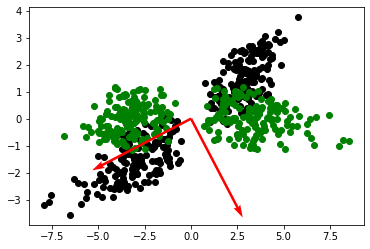

In [ ]:
mX=X_1
for i in range(X_1.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X_1[:,i])

plt.scatter(mX[:,0],mX[:,1],color="black")
plt.scatter(PCscore[:,0],PCscore[:,1],color="green")
origin = (0,0) # origin point
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color=['r','b'], scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color=['r','b'], scale=3)
plt.show()

### 문제 7. [PCA] PC를 활용한 차원 축소

In [ ]:
# Priciple Component는 한쪽으로 정보를 몰아준다. 첫번째가 보통 eigen value값이 압도적으로 크다.
# 단, 요소 분할, 요소 별 독립이라는 가정 하에.

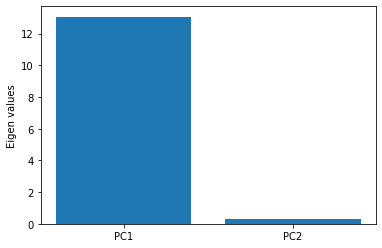

In [ ]:
## (문제) eigen value를 barplot으로 표현하여 PC1과 PC2의 eigen value 값의 차이를 비교합니다.
label = ['PC1', 'PC2']
index = np.arange(len(label))

plt.bar(index,pca.explained_variance_)
plt.ylabel('Eigen values')
plt.xticks(index,label)
plt.show()

In [ ]:
PCscore

array([[ 2.63595872e+00,  9.51221703e-01],
       [-4.79153199e+00, -3.89366241e-03],
       [ 3.67737753e+00,  1.95026949e-01],
       [ 3.50983062e+00, -6.04572440e-01],
       [ 3.65909682e+00,  1.68818201e-01],
       [ 4.42415324e+00, -2.23504097e-01],
       [ 3.47123517e+00, -3.26725709e-01],
       [-4.01560446e+00, -9.21324961e-01],
       [ 4.18028604e+00,  7.76788656e-02],
       [ 2.78952803e+00,  1.16717890e+00],
       [ 4.30024337e+00,  7.26998359e-01],
       [-2.95784012e+00,  6.60966562e-01],
       [-4.71347347e+00, -7.65133368e-01],
       [ 3.51352211e+00,  4.78904097e-01],
       [ 3.43467859e+00,  3.88361860e-02],
       [ 1.31095644e+00,  7.51586755e-01],
       [-3.13965327e+00,  2.74002638e-01],
       [-3.89054579e+00,  1.64513568e-01],
       [ 2.80073937e+00,  6.78750689e-02],
       [-1.80166745e+00, -4.37498195e-01],
       [ 2.60711133e+00,  4.03126312e-01],
       [ 1.86882828e+00,  7.54297318e-01],
       [-4.29838006e+00,  8.81292959e-02],
       [-3.

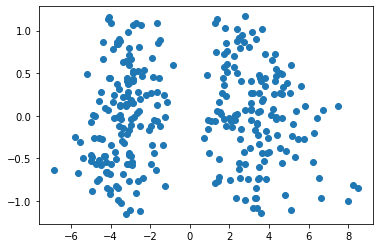

In [ ]:
plt.scatter(PCscore[:,0],PCscore[:,1]) # PCscore-1: X축 방향 eigen vector(중요), PCscore-2: y축 방향 eigen vector
plt.show() # X-range >> y-range + 1차원으로 정사영을 내리게 됐을 때, 중첩 정도

In [ ]:
np.matrix(PCscore[:,0])

matrix([[ 2.63595872, -4.79153199,  3.67737753,  3.50983062,  3.65909682,
          4.42415324,  3.47123517, -4.01560446,  4.18028604,  2.78952803,
          4.30024337, -2.95784012, -4.71347347,  3.51352211,  3.43467859,
          1.31095644, -3.13965327, -3.89054579,  2.80073937, -1.80166745,
          2.60711133,  1.86882828, -4.29838006, -3.0845923 , -4.95526995,
          4.32933707, -2.93196277,  3.79972137,  5.63130033, -6.87618445,
          3.10290144, -3.57698353,  2.10039807, -1.499805  , -5.22323931,
         -2.8798139 , -2.67199734, -3.24628367,  2.4806673 ,  2.2384628 ,
         -3.50872755,  1.7393846 , -4.11283965, -1.13617584, -4.11945605,
          7.46113382,  3.4358055 , -1.63731291,  1.97295889,  2.79516924,
         -4.40874676,  1.58223175, -3.56188272,  2.30691248, -2.88179726,
          3.20865022,  4.55145942, -4.58399198,  1.81566656, -3.38317727,
          0.90239317,  3.21098925,  4.34801536, -1.97787596,  4.26549913,
         -3.46726034, -3.52541304, -2.

In [ ]:
## (문제) PC1 만을 활용하여 KMeans clustering을 진행한 후 해당 클러스터로 색상을 넣어 X_1의 Scatter plot을 그립니다.
# 아래 PC1_matrix를 활용합니다.
PC1_matrix=np.matrix(PCscore[:,0]).transpose()

km=KMeans(n_clusters=2,random_state=1)
km.fit(PC1_matrix)
y_km=km.labels_
color_code={0:'Orange',1:'Skyblue'}

sns.scatterplot(x=X_1[:,0],y=X_1[:,1],c=[color_code.get(i) for i in y_km])
plt.show()

##Step 4. 비선형 관계 데이터에의 적용

### 문제 8. K-means의 비선형 관계 데이터에의 적용

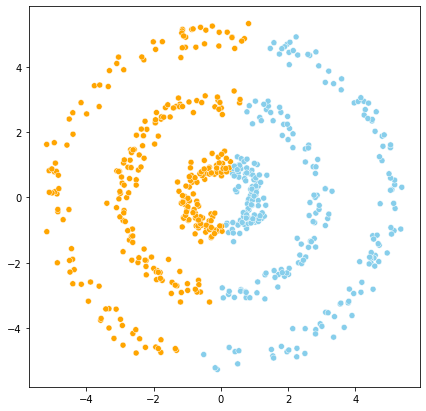

In [ ]:
## (문제) 비선형 관계 데이터인 X_2를 바탕으로 sklearn.cluster.KMeans를 활용하여 클러스터를 생성한 후
# seaborn.scatterplot을 이용하고 클러스터별 color_code를 적용하여 플랏을 그립니다.
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2,random_state=1)
km.fit(X_2)
y_km=km.labels_

sns.scatterplot(x=X_2[:,0],y=X_2[:,1],c=[color_code.get(i) for i in y_km])
plt.show()
# 아래 이미지가 거리 유사도를 이용한 분류의 한계다.
# 즉, 우리는 비선형의 창으로 새로운 관점으로 해석하려고 하고, 그것이 바로 Kernel이다.

### 문제 9. PCA의 비선형 관계 데이터에의 적용

C:\BIGDATA\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\BIGDATA\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


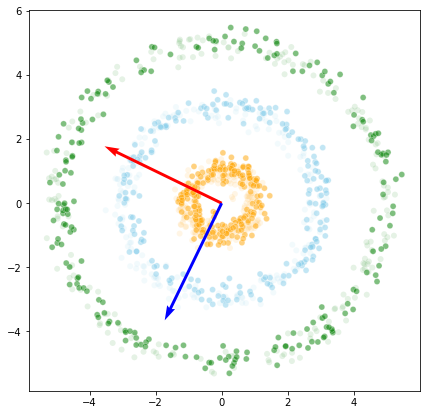

In [ ]:
## (문제) 비선형 관계 데이터인 X_2를 바탕으로 sklearn.decomposition.PCA 활용하여 PCA를 진행한 후
# PC score에 대하여 seaborn.scatterplot을 이용하고 클러스터별 color_code를 적용하여 플랏을 그립니다.
# 원본 데이터 (alpha=0.1)와 PC score (alpha=0.5)를 플랏을 함께 그린 뒤 비교하여 어떻게 변했는지를 살핍니다.
pca=PCA()
pca.fit(X_2)
eigens_v=pca.components_.transpose()
PCscore=pca.transform(X_2)
color_code= { 0:'orange',1:'skyblue',2:'green'}

mX=X_2
for i in range(X_2.shape[1]):
  mX[:,i]=mX[:,i]-np.mean(mX[:,i]) # Centering을 안 해줘도 된다. 지금은 원점을 기준으로 시각화하려고(->eigen vector가 고유해보이려고). 이것을 꼭 해줘야할 때는 XX.T의 공분산 SVD할 때

plt.figure(figsize=(7,7))

sns.scatterplot(mX[:,0],mX[:,1],c=[color_code.get(i) for i in y_2],alpha=0.1)
sns.scatterplot(PCscore[:,0],PCscore[:,1],c=[color_code.get(i) for i in y_2],alpha=0.5)
origin=(0,0)
plt.quiver(*origin,eigens_v[0,0],eigens_v[1,0],color='r',scale=3) # *은 0과 0을 쪼개서 하나씩 넣어줘라는 의미.
plt.quiver(*origin,eigens_v[0,1],eigens_v[1,1],color='b',scale=3)



In [ ]:
pca.explained_variance_ # 즉, PCscore를 보면, 선형패턴이 없으니, 큰 변화가 없고, Eigen Vector는 고유값이 비슷하고, 방향도 유의미하지 않는 기준이다.

array([5.93851327, 5.68964896])

### 문제 10. Interleaving half circles 데이터 생성 및 K-means, PCA 적용

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
# (문제) sklearn.datasets.make_moons를 활용하여 n_samples=300, random_state=1을 적용하여 데이터 생성하여 X_3, y_3에 저장.
X_3,y_3 = make_moons(n_samples=300, random_state=1)

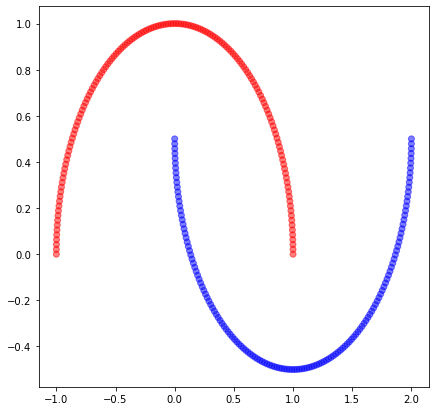

In [ ]:
# (문제) matplotlib.pyplot.scatter을 활용하고 아래의 클러스터별 color_code를 적용하여 플랏을 그립니다.
plt.figure(figsize=(7,7))
color_code = {0:'red', 1:'blue'}

plt.scatter(X_3[:,0],X_3[:,1],c=[color_code.get(i) for i in y_3],alpha=0.5)
plt.show()

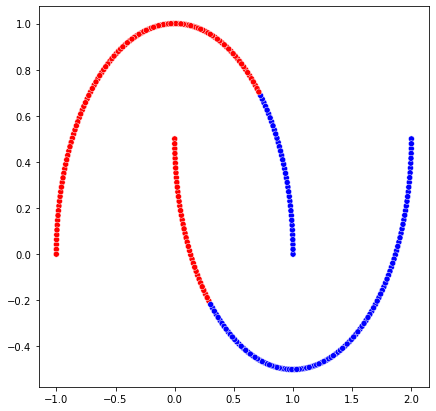

In [ ]:
# (문제) 비선형 관계 데이터인 X_3를 바탕으로 sklearn.cluster.KMeans를 활용하여 클러스터를 생성한 후
# seaborn.scatterplot을 이용하고 클러스터별 color_code를 적용하여 플랏을 그립니다.
color_code = {0:'red', 1:'blue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2,random_state=1)
km.fit(X_3)
y_km= km.labels_
sns.scatterplot(x=X_3[:,0],y=X_3[:,1],c=[color_code.get(i) for i in y_km])
plt.show()

#K-means는 affinity가 Euclidean Distance이므로 -> 어쩔 수 없는 한계.

C:\BIGDATA\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\BIGDATA\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


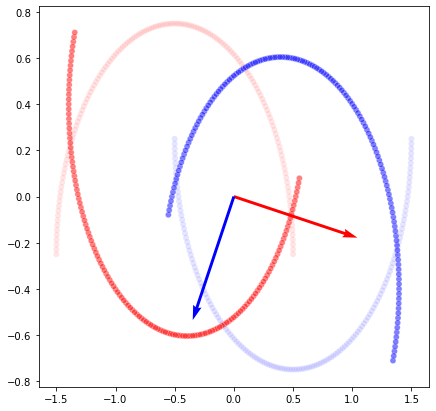

In [ ]:
## (문제) 비선형 관계 데이터인 X_3를 바탕으로 sklearn.decomposition.PCA 활용하여 PCA를 진행한 후
# PC score에 대하여 seaborn.scatterplot을 이용하고 클러스터별 color_code를 적용하여 플랏을 그립니다.
# 원본 데이터 (alpha=0.1)와 PC score (alpha=0.5)를 비교하여 어떻게 변했는지를 살핍니다.

pca=PCA()
pca.fit(X_3)
PCscore=pca.transform(X_3)
eigens_v=pca.components_.transpose()
color_code={0:'red',1:'blue'}

mX=X_3
for i in range(X_3.shape[1]):
  mX[:,i]=mX[:,i]-np.mean(mX[:,i])

plt.figure(figsize=(7,7))

sns.scatterplot(mX[:,0],mX[:,1],c=[color_code.get(i) for i in y_3],alpha=0.1)
sns.scatterplot(PCscore[:,0],PCscore[:,1],c=[color_code.get(i) for i in y_3],alpha=0.5)
origin=(0,0)
plt.quiver(*origin,eigens_v[0,0],eigens_v[1,0],color="r",scale=3)
plt.quiver(*origin,eigens_v[0,1],eigens_v[1,1],color="b",scale=3)




In [ ]:
pca.explained_variance_ # 즉, PCscore를 보면, 선형패턴이 없으니, 의미없는 회전, Eigen Vector는 고유값이 비슷하고, 방향도 유의미하지 않는 기준이다.

array([0.81973722, 0.17991886])

### 문제 11. Spiral 데이터 생성 및 K-means, PCA 적용

In [7]:
!pip install git+https://github.com/lovit/synthetic_dataset

  Cloning https://github.com/lovit/synthetic_dataset to /tmp/pip-req-build-v_nqx_g_
  Running command git clone -q https://github.com/lovit/synthetic_dataset /tmp/pip-req-build-v_nqx_g_
  Created wheel for soydata: filename=soydata-0.1.0-py3-none-any.whl size=20031 sha256=32c7d3579300ff472135f231c77838b3a158e79775fbe7ff82d554436401a537
  Stored in directory: /tmp/pip-ephem-wheel-cache-pwiv4ohf/wheels/42/28/7e/22497b8e34e6380a75109acea1def2407cb8045873af5a2daa
Successfully built soydata


In [8]:
from soydata.data import *

In [9]:
# (문제) soydata.data.classification.make_spiral를 활용하여 n_samples_per_class=500,n_classes=2,
# n_rotations=3, gap_between_spiral=10, gap_between_start_point=1, noise=0.1 을 적용하여 데이터 생성하여 X_4, y_4에 저장.
X_4,y_4 = classification.make_spiral(n_samples_per_class=500,n_classes=2,n_rotations=2,gap_between_spiral=30,noise=0.05)

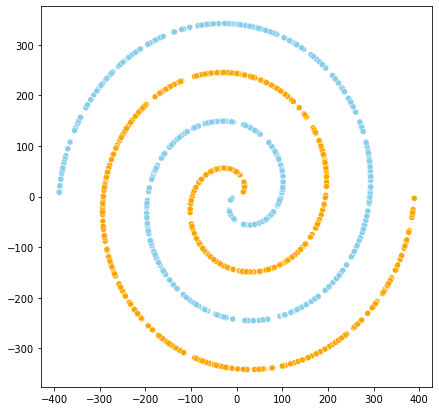

In [10]:
# (문제) matplotlib.pyplot.scatter을 활용하고 아래의 클러스터별 color_code를 적용하여 플랏을 그립니다
plt.figure(figsize=(7,7))
color_code = {0:'Orange', 1:'Skyblue'}

sns.scatterplot(x=X_4[:,0],y=X_4[:,1],c=[color_code.get(i) for i in y_4])
plt.show()

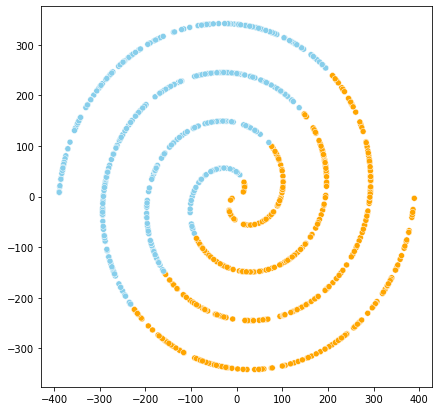

In [13]:
# (문제) 비선형 관계 데이터인 X_4를 바탕으로 sklearn.cluster.KMeans를 활용하여 클러스터를 생성한 후
# seaborn.scatterplot을 이용하고 클러스터별 color_code를 적용하여 플랏을 그립니다.
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2,random_state=1)
km.fit(X_4)
y_km=km.labels_
sns.scatterplot(x=X_4[:,0],y=X_4[:,1],c=[color_code.get(i) for i in y_km])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



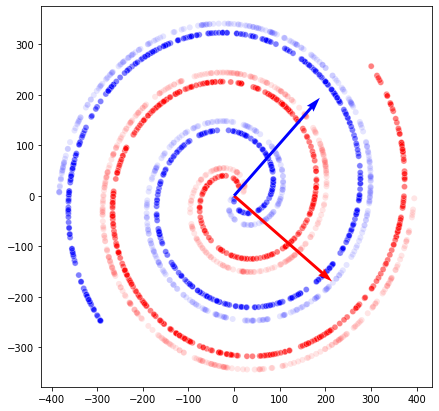

In [16]:
## (문제) 비선형 관계 데이터인 X_4를 바탕으로 sklearn.decomposition.PCA 활용하여 PCA를 진행한 후
# PC score에 대하여 seaborn.scatterplot을 이용하고 클러스터별 color_code를 적용하여 플랏을 그립니다.
# 원본 데이터 (alpha=0.1)와 PC score (alpha=0.5)를 비교하여 어떻게 변했는지를 살핍니다.

pca=PCA()
pca.fit(X_4)
PCscore=pca.transform(X_4)
eigens_v=pca.components_.transpose()
color_code={0:'red',1:'blue'}

mX=X_4
for i in range(X_4.shape[1]):
  mX[:,i]=mX[:,i]-np.mean(mX[:,i])

plt.figure(figsize=(7,7))

sns.scatterplot(mX[:,0],mX[:,1],c=[color_code.get(i) for i in y_4],alpha=0.1)
sns.scatterplot(PCscore[:,0],PCscore[:,1],c=[color_code.get(i) for i in y_4],alpha=0.5)
origin=(0,0)
plt.quiver(*origin,eigens_v[0,0],eigens_v[1,0],color="r",scale=3)
plt.quiver(*origin,eigens_v[0,1],eigens_v[1,1],color="b",scale=3)


In [17]:
pca.explained_variance_ #역시 고유값 차이도 유의미하지 않고, 방향성도 큰 기준이 되지 못한다. 또한 PCscore도 의미없는 회전일 뿐.

array([40435.15181692, 32373.06162701])